In [3]:
import numpy as np
from importlib import reload
from scipy import signal

import plotting_tools as pt
import utils
import dsi
utils = reload(utils)
pt = reload(pt)
dsi = reload(dsi)

import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

In [42]:
Nx, Ny = 301, 20
# Nx, Ny = 1201, 80

N = 1

def load(Nx,Ny,et):
    base_fn = 'output_baldauf_brdar'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

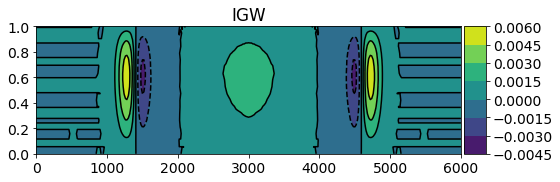

In [43]:
l_typ = 'WINDOW_STEP'
diff = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='after_full_step', inner=False)[1]

    label = sfx + '_' + attribute
    return label, ens.T

typ = 'nonhydro'
# typ = 'hydro'
# typ = 'psinc'

et = 39.4
sfx1 = 'long_%s' %typ

tc, tags = load(Nx,Ny,et)
times = [57]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'rhoY'
_, a2 = get_ens(tc, times, sfx1, diff, attribute)

la = 'IGW'
aa = a2 / a1
aa -= S0 #* ud.T_ref
aa = aa[i2] * ud.T_ref
# aa *= ud.T_ref
sigma = 0.78
# aa = gaussian_filter(aa, sigma)

if sfx1 == 'long':
    lvls = np.arange(-2.5,4.0,0.5) * 1e-3
#     lvls = np.arange(-0.1,11,1) * 1e-3
    lvls = np.arange(-0.0025,0.00295,0.000496)

ll = [aa, la]
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
x_axs = np.array([0,1000,2000,3000,4000,5000,6000])
# y_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
x_loc = np.linspace(0,Nx-1,7)
y_loc = np.linspace(0,Ny-1,6)
# x_label = r'x [$\times 10$ km]'
# y_label = r'y [$\times 10$ km]'

pl.set_axes(y_locs=y_loc,y_axs=y_axs, x_locs=x_loc,x_axs=x_axs)
# pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(method='contour', lvls=None)

# lbl = 'swe' if swe else 'euler'
# pl.save_fig('initial_vortex_%s' %lbl)

Acoustic-inertia wave profiles

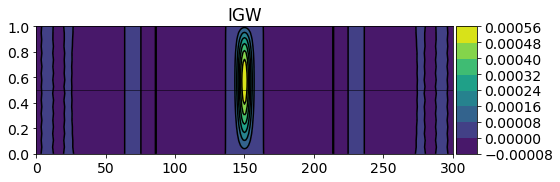

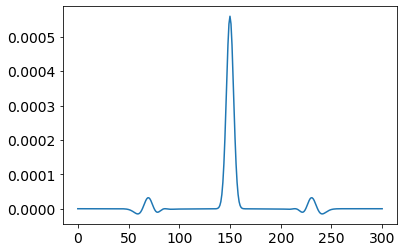

In [44]:
l_typ = 'WINDOW_STEP'
diff = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='after_full_step', inner=False)[1]

    label = sfx + '_' + attribute
    return label, ens.T

typ = 'nonhydro'
# typ = 'hydro'
# typ = 'psinc'

et = 39.4
sfx1 = 'long_%s' %typ

tc, tags = load(Nx,Ny,et)
times = [57]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'rhov'
_, a2 = get_ens(tc, times, sfx1, diff, attribute)

la = 'IGW'
aa = a2 / a1
aa = aa[i2]
sigma = 0.78
# aa = gaussian_filter(aa, sigma)

if sfx1 == 'long':
    lvls = np.arange(-2.5,4.0,0.5) * 1e-3
#     lvls = np.arange(-0.1,11,1) * 1e-3
    lvls = np.arange(-0.0025,0.00295,0.000496)

ll = [aa, la]
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
y_loc = np.linspace(0,Ny-1,6)
pl.set_axes(y_locs=y_loc,y_axs=y_axs,axhline=9.5)
_ = pl.plot(method='contour', lvls=None)

plt.figure()
plt.plot(aa[11])
plt.show()
